<a href="https://colab.research.google.com/github/joheras/MusicaCatedralStoDomingoIER/blob/main/Notebooks/SacarM%C3%BAsica/Creando_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets para entrenamiento
- Vamos a crear con algunos de los pentagramas un dataset para la posterior clasificación.

## Librerías

In [1]:
%%capture
pip install py_midicsv

In [2]:
%%capture
pip install MIDIUtil

In [3]:
%%capture
pip install pretty_midi

In [1]:
import cv2
import pickle
import midiutil
import pretty_midi
import IPython.display as ipd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colors
import statistics
import py_midicsv as pm
import random
import sys
import os
import music21 as m21

## Funciones

In [2]:
def verPagina(num_obra):
  for cla in ini_Obras:
    if num_obra in ini_Obras[cla]: return cla

In [3]:
def borrarTexto(foto,numPag):
  n = len(texto[numPag]['text'])
  foto2 = foto.copy()
  for i in range(0,n):
    x = texto[numPag]['left'][i]
    y = texto[numPag]['top'][i]
    h = texto[numPag]['height'][i]
    w = texto[numPag]['width'][i]
    cv2.rectangle(foto2, (x-150, y-2), (x + w + 150, y + h+2), (255, 255, 255), -1)
  return foto2

In [195]:
def transform(foto):
  pag = foto.copy()
  pag  = cv2.cvtColor(pag,cv2.COLOR_RGB2GRAY)
  _,pag=cv2.threshold(pag, 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
  kernel = np.ones((1,100),dtype='uint8')
  pag = cv2.morphologyEx(pag,cv2.MORPH_TOPHAT,kernel)
  kernel = np.ones((2,1),dtype='uint8')
  pag = cv2.erode(pag,kernel)
  kernel = np.ones((5,2),dtype='uint8')
  pag = cv2.morphologyEx(pag,cv2.MORPH_CLOSE,kernel)
  kernel = np.ones((2,4),dtype='uint8')
  pag = cv2.dilate(pag,kernel)
  return pag

## Recuperando las fotos

In [2]:
%%capture
!wget https://www.dropbox.com/s/u2ekoltvu35kfjw/Fotos.zip?dl=1 -O Fotos.zip

In [3]:
%%capture
!unzip Fotos.zip

In [5]:
with open("texto.pickle", "rb") as f:
    texto = pickle.load(f)
with open("pentagramas2.pickle", "rb") as f:
    pentagramas2 = pickle.load(f)
with open("ini_Obras.pickle", "rb") as f:
    ini_Obras = pickle.load(f)
with open("Obras_final.pickle", "rb") as f:
    Obras_final = pickle.load(f)
with open("Obras.pickle", "rb") as f:
    Obras = pickle.load(f)

In [6]:
claves = [cla for cla in pentagramas2]
Pagina = {}
for cla in claves:
  foto = cv2.imread('Fotos/pag'+str(cla)+'.jpg')
  foto = cv2.cvtColor(foto,cv2.COLOR_BGR2RGB)
  Pagina[cla] = foto

### Cogiendo una muestra de los pentagramas para entrenar.
 - De un pentagrama salen bastantes símbolos así que de momento no vamos a coger demasiados.
 - Ponemos una semilla (random_state) para obtener siempre la misma muestra

In [7]:
S = 0
for cla in claves:
  S = S + len(pentagramas2[cla])
S

2308

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
k = 1
for cla in claves:
  pag = Pagina[cla]
  for i in range(0,len(pentagramas2[cla])):
    x,y,w,h = pentagramas2[cla][i]
    pent = borrarTexto(pag,cla)[y:y+h,x:x+w]
    cv2.imwrite('/content/pentagramas/pent' + str(k) + '.jpg',pent)
    k = k + 1

In [21]:
from sklearn.model_selection import train_test_split
muestra = [i for i in range(1,k)]
_, muestra, _, _, = train_test_split(muestra, muestra, test_size=0.13, random_state=42)

In [24]:
len(muestra)

301

In [25]:
print(muestra)

[1643, 510, 1135, 45, 974, 1118, 1746, 1661, 2021, 1248, 1576, 472, 1412, 209, 1242, 508, 1350, 283, 1226, 483, 1407, 941, 1961, 621, 930, 1331, 434, 1056, 1954, 1353, 1930, 2168, 1211, 1104, 801, 1819, 678, 30, 1422, 1863, 2060, 1921, 734, 1042, 1740, 2131, 2277, 1488, 433, 1057, 1343, 2163, 462, 1866, 1765, 1933, 963, 2164, 2286, 773, 1660, 2272, 1533, 1675, 112, 1293, 252, 916, 230, 600, 291, 423, 2187, 1534, 1180, 2072, 975, 135, 1035, 611, 2276, 197, 322, 1977, 479, 1721, 219, 101, 2002, 1291, 424, 57, 1217, 1092, 591, 1468, 1832, 1122, 1727, 743, 1547, 1302, 415, 2178, 1950, 1387, 1026, 2234, 747, 1171, 917, 248, 2177, 2257, 1001, 486, 97, 2120, 180, 1111, 1799, 1011, 1323, 882, 255, 1546, 1780, 446, 436, 760, 1126, 1674, 1205, 631, 1431, 473, 1522, 880, 1772, 565, 529, 890, 1654, 280, 308, 1897, 1893, 2095, 2005, 2150, 1784, 1512, 1434, 799, 509, 409, 950, 1402, 71, 1865, 189, 439, 304, 1718, 1212, 1279, 1884, 260, 1447, 1754, 1191, 1653, 811, 158, 835, 530, 1745, 1335, 421, 160

## Comenzando el proceso

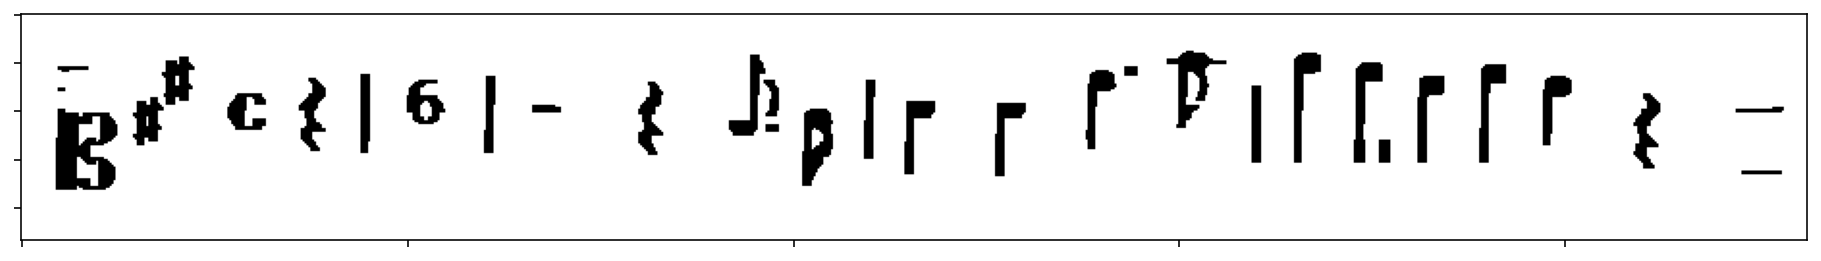

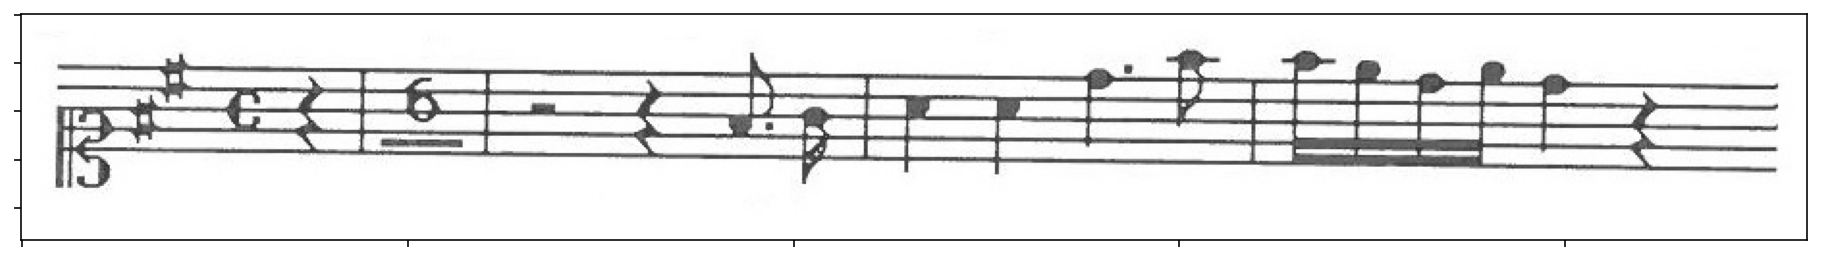

In [261]:
i = 487
pent = cv2.imread('/content/pentagramas/pent' + str(i) + '.jpg')
pent = cv2.cvtColor(pent,cv2.COLOR_BGR2RGB)
p = transform(pent.copy())

# QUITAMOS LA UNIÓN DE LAS NOTAS
cnts,_ = cv2.findContours(p, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  if w > 40:
    kernel = np.ones((9,1),dtype='uint8')
    p[y-7:y+h+7,x-7:x+w+7] = cv2.morphologyEx(p[y-7:y+h+7,x-7:x+w+7],cv2.MORPH_ELLIPSE,kernel)

# HACEMOS BONDUING BOX DE LOS SÍMBOLOS
cnts,_ = cv2.findContours(p, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in cnts: # TERMINAR

fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(p,cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(pent)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()